In [2]:
from sobel import to_grayscale, sobel_edge_detector
import cv2
import numpy as np


thresholds = range(20, 100, 20)

results_blur1 = np.zeros((14, len(thresholds)))
results_blur2 = np.zeros((14, len(thresholds)))

for i in range(1, 15):
    image_path = f'your_path/images/{i}.jpg'
    image_rgb = cv2.imread(image_path)
    
    if image_rgb is None:
        print(f"Failed to read image at {image_path}")
        continue
    
    image = to_grayscale(image_rgb).astype(int)
    
    for j, t in enumerate(thresholds):
        edges1, _ = sobel_edge_detector(image, threshold=t, blur=1)
        edges2, _ = sobel_edge_detector(image, threshold=t, blur=2)
        
        results_blur1[i-1, j] = edges1.sum() / edges1.size
        results_blur2[i-1, j] = edges2.sum() / edges2.size


print("Results for blur = 1:")
print(results_blur1)

print("Results for blur = 2:")
print(results_blur2)


Results for blur = 1:
[[ 89.82085608  62.32760798  44.16723337  30.61962034]
 [136.04260983  63.07080265  36.13907941  23.8582004 ]
 [179.43692075 111.31734898  74.47306041  53.39275652]
 [125.57017118  88.60366837  60.80488468  41.56935512]
 [ 24.36687586  11.5475936    8.89025978   5.91252647]
 [116.30501098  86.73246935  66.32764684  49.42244545]
 [ 91.57975013  49.16480463  32.39172674  22.71202907]
 [ 76.89422348  50.62146618  32.37025667  20.70870655]
 [124.58750267  74.3706647   49.67678318  35.79720986]
 [155.04857481 112.97880195  86.89432063  68.25004372]
 [ 39.19443527  14.1851089    8.73501467   4.87205394]
 [ 84.86622496  51.98729283  37.23405289  27.01925506]
 [126.22583403  67.03615909  37.37938873  21.6401772 ]
 [186.72188004 110.42221229  66.10799153  40.0796627 ]]
Results for blur = 2:
[[ 86.56236035  52.32420774  30.90368586  17.10503818]
 [108.58734723  47.67676375  27.43048944  17.84823285]
 [161.01395069  91.80931471  57.31847592  37.77906231]
 [119.76004041  74.4

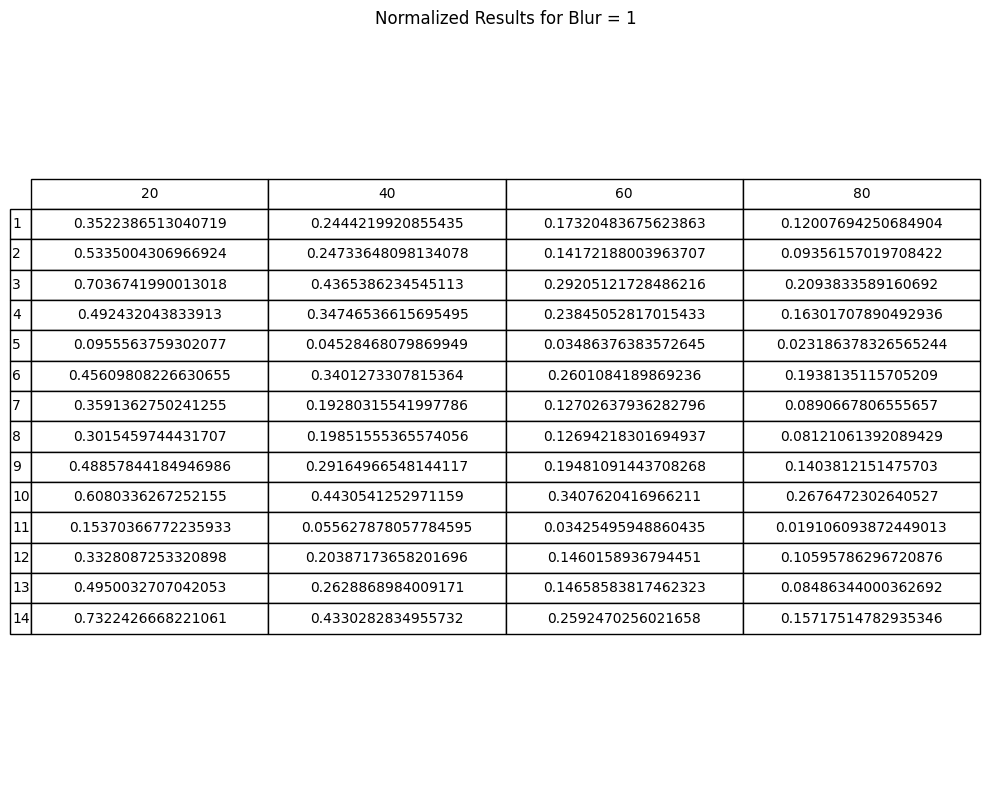

In [6]:
import matplotlib.pyplot as plt


results_blur1_normalized = results_blur1 / 255.0


image_ids = range(1, 15)
thresholds = range(20, 100, 20)


fig, ax = plt.subplots(figsize=(10, 8))


table = ax.table(cellText=results_blur1_normalized, rowLabels=image_ids, colLabels=thresholds,
                 loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

ax.axis('off')  
ax.set_title('Normalized Results for Blur = 1')

plt.tight_layout()
plt.show()


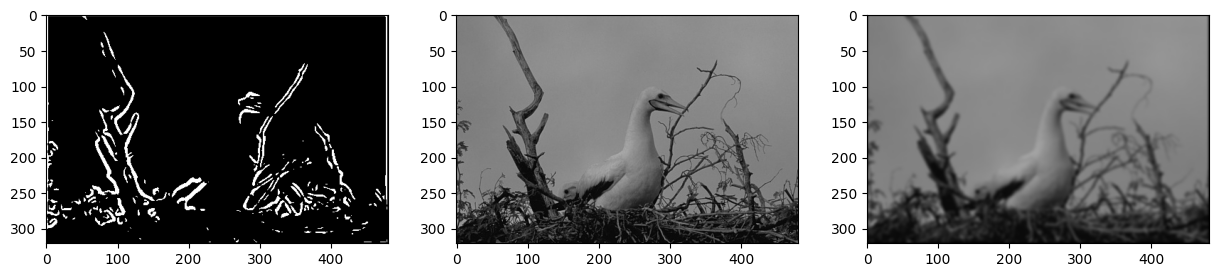

In [35]:
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.imshow(np.transpose([edges,edges,edges],(1,2,0)))
plt.subplot(1,3,2)
plt.imshow(np.transpose([image,image,image],(1,2,0)).astype(int))
plt.subplot(1,3,3)
plt.imshow(np.transpose([i,i,i],(1,2,0)).astype(int))